In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import scipy

In [4]:
from math import sqrt

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn.metrics import accuracy_score

In [123]:
from sklearn.metrics import recall_score

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import cross_validate

In [14]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [21]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [23]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [24]:
credit.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [15]:
credit.rename(columns={'default payment next month':'default'}, inplace=True)

In [16]:
credit['EDUCATION']=credit['EDUCATION'].map({0:'0', 1:'1', 2:'2', 3:'3', 4:'0', 5:'0', 6:'0'})

In [17]:
credit["EDUCATION"]=credit["EDUCATION"].astype(np.int64)

In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [18]:
credit['default'] = credit.default.map({0:'no', 1:'yes'})

In [30]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null object
dtypes: int64(24), object(1)
memory usag

In [32]:
pd.set_option('display.max_columns', 100)

In [ ]:
pd.set_option('display.width', 100)

In [33]:
corrMat = credit.corr()
print(corrMat)

                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.013198 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.245297 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.008144 -0.031389 -0.090874   
EDUCATION  0.013198  -0.245297  0.008144   1.000000 -0.146705  0.180332   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.146705  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.180332 -0.414170  1.000000   
PAY_0     -0.030575  -0.271214 -0.057643   0.132036  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.155089  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.148547  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.140184  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.125987  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.115256  0.034345 -0.048773   
BILL_AMT1  0.019389   0.2

In [34]:
covMat = credit.cov()
print(covMat)

                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379     83.265409  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -23185.367949 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.002902    -0.008014   
EDUCATION  8.326541e+01 -2.318537e+04     0.002902      0.530692    -0.055784   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.055784     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.210948    -1.992764   
PAY_0     -2.975726e+02 -3.954593e+04    -0.031685      0.108094     0.011683   
PAY_2     -1.162770e+02 -4.603765e+04    -0.041442      0.135258     0.015122   
PAY_3     -1.916922e+02 -4.443225e+04    -0.038694      0.129518     0.020421   
PAY_4     -2.769132e+01 -4.057181e+04    -0.034411      0.119395     0.020213   
PAY_5     -2.178600e+02 -3.667056e+04    -0.030521      0.104004     0.021074   
PAY_6     -2.018774e+02 -3.5

In [19]:
features= credit. iloc[:, 1:24]

In [44]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [20]:
depVar = credit['default']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3, random_state=2018)

In [110]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14317,360000,2,1,2,27,-1,-1,0,0,0,2,1994,5305,4960,5228,6552,3827,5317,1007,2006,2562,13,2989
9775,50000,1,2,1,42,0,0,0,0,0,0,35255,21317,22252,22541,22863,20288,1690,1620,900,780,750,1670
19708,180000,2,1,2,28,0,0,0,0,0,0,131007,131632,136239,138116,135246,130436,5000,7000,6500,5000,5000,5000
14254,50000,1,2,2,22,1,2,0,0,0,0,50781,45429,28927,19896,19475,19168,41,1617,816,1003,1004,912
4366,90000,1,2,1,36,4,3,2,0,0,0,62737,61413,59823,29526,25903,26563,0,0,1300,1000,1000,1500


In [48]:
y_train_count = len(y_train.index)

In [49]:
y_train_count

21000

In [50]:
y_train.head()

14317     no
9775      no
19708     no
14254     no
4366     yes
Name: default, dtype: object

In [51]:
X_test_count = len(X_test.index)

In [52]:
X_test_count

9000

In [53]:
y_test.head()

8343     no
2228     no
6293     no
16805    no
3519     no
Name: default, dtype: object

In [22]:
from sklearn.decomposition import PCA

In [23]:
from sklearn.preprocessing import StandardScaler

Use PCA to create second dataset

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_train2 = scaler.transform(X_train)

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
X_test2 = scaler.transform(X_test)

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [28]:
pca = PCA(.95)

In [29]:
pca.fit(X_train2)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.n_components_

15

In [31]:
X_train2 = pca.transform(X_train2)
X_test2 = pca.transform(X_test2)

In [108]:
X_test2

array([[-1.40962201e-01, -8.88901108e-01,  3.47826719e-01, ...,
         1.24643358e-01,  4.45774911e-01, -2.10458798e-02],
       [ 1.83228213e-01, -7.40731987e-01,  2.86865910e-01, ...,
         7.49379990e-02,  3.66691719e-01,  9.82104939e-04],
       [-1.16889130e+00, -1.82270306e-01, -6.79318559e-01, ...,
         4.40049552e-01,  3.66079282e-01,  2.70217011e-01],
       ...,
       [-3.11463273e+00,  2.61779822e+00, -7.53483621e-01, ...,
        -7.86894686e-01, -1.14958853e-02,  2.46456718e-01],
       [-2.72702225e+00,  8.16930913e-01, -1.85253027e+00, ...,
        -4.39179606e-01, -9.50662924e-02, -1.69960478e+00],
       [-2.35631855e+00,  6.58113630e-01,  4.58523090e-01, ...,
         3.89023849e-01,  9.05402527e-01,  1.51089419e-01]])

train the model-with first dataset

In [70]:
k_range=range(1,31)

In [71]:
k_scores=[]

In [158]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [74]:
import matplotlib.pyplot as plt

In [183]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

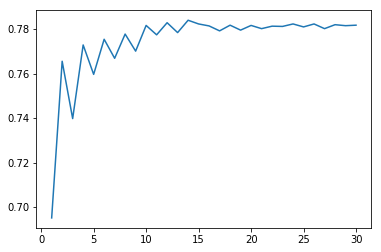

In [159]:
plt.plot(k_range, k_scores)

In [184]:
knn2=KNeighborsClassifier(n_neighbors=20)

In [185]:
scores2=cross_val_score(knn2, X_train, y_train, cv=10, scoring='accuracy')

In [186]:
print(scores2.mean())

0.7735236097937135


In [187]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

SVM with the first dataset

In [35]:
svc = SVC()

In [38]:
svc.fit(X_train,y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [33]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_search = GridSearchCV(svc, param_grid, n_jobs = 1, verbose=10)

In [38]:
grid_search.fit(X_train, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.1 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=0.1, score=0.7773175260677047, total= 2.4min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=0.1, score=0.7772857142857142, total= 2.4min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.1min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=0.1, score=0.777396770967281, total= 2.4min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.2min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=1, score=0.7776031995429225, total= 2.8min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 12.7min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=1, score=0.7771428571428571, total= 2.6min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.0min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=1, score=0.7785397913987713, total= 3.0min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 19.7min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=10, score=0.7771746893300957, total= 3.8min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 24.3min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.775, total= 4.0min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 28.9min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=10, score=0.7782540362908987, total= 3.9min
[CV] C=100 ...........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 33.5min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=100, score=0.776746179117269, total= 3.8min
[CV] C=100 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=100, score=0.7748571428571429, total= 4.0min
[CV] C=100 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=100, score=0.7778254036290899, total= 3.9min
[CV] C=1000 ..........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=1000, score=0.776746179117269, total= 2.7min
[CV] C=1000 ..........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1000, score=0.7748571428571429, total= 4.2min
[CV] C=1000 ..........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1000, score=0.7778254036290899, total= 2.7min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 59.1min finished
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=10)

In [39]:
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)

C 1
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma auto_deprecated
kernel rbf
max_iter -1
probability False
random_state None
shrinking True
tol 0.001
verbose False


In [41]:
svc2 = SVC(C=best_parameters['C'])

In [42]:
svc2.fit(X_train, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
scoressvc=cross_val_score(svc2, X_train, y_train, cv=10, scoring='accuracy')

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [60]:
print(scoressvc.mean())

0.7783332024403116


Random Forest with first data

In [138]:
param={'n_estimators':range(10,81,10)}

In [51]:
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                 min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),
                       param_grid =param, scoring='roc_auc',cv=10)

In [52]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 40}, 0.7811026475330098)

In [55]:
rf=RandomForestClassifier(n_estimators=40)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
scoresrf=cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

In [63]:
print(scoresrf.mean())

0.8118089457076758


build knn model with pca data set

In [73]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train2, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

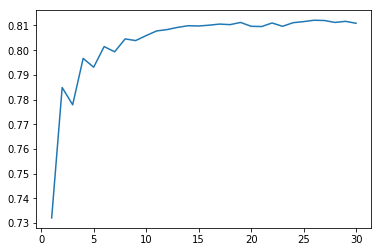

In [75]:
plt.plot(k_range, k_scores)

In [76]:
knnpca=KNeighborsClassifier(n_neighbors=20)

In [77]:
pcascores=cross_val_score(knnpca, X_train2, y_train, cv=10, scoring='accuracy')

In [79]:
print(pcascores.mean())

0.8094289678977251


In [80]:
knnpca.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

build random forest model with pca data set

In [140]:
gsearch1.fit(X_train2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [141]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.762094029197715)

In [142]:
rfpca=RandomForestClassifier(n_estimators=50)

In [146]:
rfpca.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
scoresrfpca=cross_val_score(rfpca, X_train2, y_train, cv=10, scoring='accuracy')

In [87]:
print(scoresrfpca.mean())

0.8072385138538906


build svc model with pca data set

In [88]:
param_gridpca = {'C': [0.1, 1, 10, 100]}

In [89]:
grid_searchpca = GridSearchCV(svc, param_gridpca)

In [90]:
grid_searchpca.fit(X_train2, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [91]:
best_parameterspca = grid_searchpca.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)

C 1
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma auto_deprecated
kernel rbf
max_iter -1
probability False
random_state None
shrinking True
tol 0.001
verbose False


In [92]:
svcpca = SVC(C=best_parameterspca['C'])

In [93]:
svcpca.fit(X_train2, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [94]:
scoressvcpca=cross_val_score(svcpca, X_train2, y_train, cv=10, scoring='accuracy')

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [143]:
print(scoressvcpca.mean())

0.815095227502427


use the model for prediction

In [159]:
predictions = svcpca.predict(X_test2)

In [160]:
predaccuracy = accuracy_score(y_test,predictions)

In [161]:
predaccuracy

0.8166666666666667

In [162]:
predictions2 = rf.predict(X_test)

In [163]:
predaccuracy2 = accuracy_score(y_test,predictions2)

In [164]:
predaccuracy2

0.8188888888888889

In [125]:
from sklearn import metrics

In [165]:
metrics.recall_score(y_test,predictions2, average='macro')

0.6527133580705009

In [166]:
df_confusion = pd.crosstab(y_test, predictions2)

In [167]:
print (df_confusion)

col_0      no  yes
default           
no       6640  400
yes      1250  710


In [168]:
importances = rf.feature_importances_

In [169]:
indices = np.argsort(importances)[::-1]

In [181]:
feat_labels = credit.columns[1:]

In [182]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) PAY_0                          0.099035
 2) AGE                            0.066012
 3) BILL_AMT1                      0.060758
 4) LIMIT_BAL                      0.059522
 5) BILL_AMT2                      0.053525
 6) BILL_AMT4                      0.051046
 7) BILL_AMT3                      0.050936
 8) PAY_AMT1                       0.050927
 9) BILL_AMT5                      0.050445
10) BILL_AMT6                      0.050160
11) PAY_AMT6                       0.046772
12) PAY_AMT2                       0.046732
13) PAY_AMT3                       0.045855
14) PAY_AMT5                       0.044615
15) PAY_AMT4                       0.044393
16) PAY_2                          0.039521
17) PAY_3                          0.029748
18) PAY_4                          0.025054
19) PAY_6                          0.020652
20) EDUCATION                      0.019729
21) PAY_5                          0.019038
22) MARRIAGE                       0.013762
23) SEX                         